# Série TP 5 - Fouille de Données - Neural Networks

### I - Neural Nets - Backpropagation Algorithm Code - From Scratch

These steps will provide the foundation that you need to implement the backpropagation algorithm from scratch and apply it to your own predictive modeling problems.

Source : https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

In [1]:
# 1. Initialize Network and Data ###########################

# Initialize a network function - init random weight and bias values
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


# 2. Forward Propagation ####################################

# Calculate neuron activation (sum) for an input : sum(weight_i * input_i) + bias
def activate_sum(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Activation function - Sigmoid : output = 1 / (1 + e^(-sum))
from math import exp
def sigmoid_activation(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row_data):
    inputs = row_data
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate_sum(neuron['weights'], inputs)
            print("Inputs : " + str(activation))
            neuron['output'] = sigmoid_activation(activation)
            print("Outputs : " + str(neuron['output']))
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


# 3. Back Propagate Error ################################

# Backpropagate error and store in neurons
# output_error = (expected - output) * transfer_derivative(output)
# hidden_error = (weight_k * error_j) * transfer_derivative(output)
# Calculate the derivative of an neuron output = output * (1.0 - output)

def transfer_derivative(output):
    return output * (1.0 - output)

def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            print("Error : " + str(neuron['delta']))
            

# 4. Update Network ###################################
# Update network weights with error
# weight = weight + learning_rate * error * input
# weight = weight + learning_rate * error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)): 
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                print(neuron['delta'], neuron['weights'][j])                
            neuron['weights'][-1] += l_rate * neuron['delta']
            print(neuron['delta'], neuron['weights'][-1])

#### Applied Example - From course/lecture

In [2]:
# Initialization of network - 1 hidden layer (2 neurons) and 1 ontput layer (1 neuron)
network = [[{'weights': [0.2, 0.4, -0.5, -0.4]}, {'weights': [-0.3, 0.1, 0.2, 0.2]}],
           [{'weights': [-0.3, -0.2, 0.1]}]]

In [3]:
# Initialization - data row and its class
row_data = [1, 0, 1, 1]
expected = [1]

In [4]:
# Forward propagation
output = forward_propagate(network, row_data)

Inputs : -0.7
Outputs : 0.3318122278318339
Inputs : 0.10000000000000003
Outputs : 0.52497918747894
Inputs : -0.10453950584533817
Outputs : 0.47388889882398544


In [5]:
# Back Propagate Error
backward_propagate_error(network, expected)

Error : 0.1311690782143445
Error : -0.008724561965433263
Error : -0.006542085064168994


In [6]:
# Update Network
l_rate = 0.9
print("Error \t\t\t New weight")
update_weights(network, row_data, l_rate)

Error 			 New weight
-0.008724561965433263 0.19214789423111006
-0.008724561965433263 0.4
-0.008724561965433263 -0.50785210576889
-0.008724561965433263 -0.40785210576888997
-0.006542085064168994 -0.30588787655775207
-0.006542085064168994 0.1
-0.006542085064168994 0.19411212344224793
-0.006542085064168994 0.19411212344224793
0.1311690782143445 -0.26082884634154524
0.1311690782143445 -0.13802506750700472
0.1311690782143445 0.21805217039291008


In [7]:
network

[[{'weights': [0.19214789423111006,
    0.4,
    -0.50785210576889,
    -0.40785210576888997],
   'output': 0.3318122278318339,
   'delta': -0.008724561965433263},
  {'weights': [-0.30588787655775207,
    0.1,
    0.19411212344224793,
    0.19411212344224793],
   'output': 0.52497918747894,
   'delta': -0.006542085064168994}],
 [{'weights': [-0.26082884634154524,
    -0.13802506750700472,
    0.21805217039291008],
   'output': 0.47388889882398544,
   'delta': 0.1311690782143445}]]

### II - Neural Nets - with scikit-learn

Multi-layer Perceptron classifier in sklearn : **MLPClassifier** class. 

**Doc** : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

**Doc** : https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/ 

**Parameters** : hidden_layer_sizes, activation, learning_rate, max_iter, etc.

**Methods** : fit(..), predict(..), score(..), get_params(..), etc.

**Attributes** : coefs_ , intercepts_ , loss_ , n_features_in_ , n_outputs_ , out_activation_ , n_layers_ , best_loss_ , validation_scores_ , etc.

**Steps:**
- Imports
- Loading the data
- Data pre-processing ans split (train/test data)
- Scaling
- MLPClassifier and Training (fit)
- Model Evaluation
- Making Predictions

#### Iris Dataset - Multi-Class Classification using MLPClassifier

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Loading and exploring dataset

In [9]:
df = pd.read_csv('Datasets/iris.csv')

In [10]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
df.shape

(150, 5)

In [12]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [13]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [14]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Preprocessing dataset

In [15]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape # 4 inputs/cols

(120, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
# To train a MLP network, the data should always be scaled because it is very sensitive to it
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training MLPClassifier 

- hidden_layer_sizes : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.
- max_iter: Indicates the number of epochs.
- activation: The activation function for the hidden layers.

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2),   # Two hidden layers with 5 and 2 neurons respect.
                    max_iter=150,                # Maximum number of iterations
                    activation='logistic',       # Sigmoid activation function
                    learning_rate_init=0.9)      # l_rate constant = 0.9

In [21]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 2),
              learning_rate_init=0.9, max_iter=150)

In [22]:
clf.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.9,
 'max_fun': 15000,
 'max_iter': 150,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [23]:
print("Number of layers:", clf.n_layers_) # 1 input layer, 2 hidden layers, and 1 output layer

Number of layers: 4


In [24]:
print("Classes:", clf.classes_)

Classes: ['Setosa' 'Versicolor' 'Virginica']


In [25]:
print("Number of outputs:", clf.n_outputs_)

Number of outputs: 3


In [26]:
print("Hidden layers:", clf.hidden_layer_sizes)

Hidden layers: (5, 2)


#### Printing weight values : clf.coefs_

In [27]:
clf.coefs_    # List of weight matrices between each layer (hiddens & output)

[array([[ 2.27934704, -4.27321999, -7.09221858, -6.72277455,  6.96607938],
        [-8.85643978,  7.4643435 ,  5.17784932,  8.54310614, -8.39953589],
        [ 6.78154801, -7.32894111, -7.77308237, -7.19026856,  8.05688015],
        [ 6.21802813, -7.18201174, -7.25137833, -7.44634327,  6.67623885]]),
 array([[-8.95873131, -7.5211549 ],
        [-5.058671  , 10.68755371],
        [-6.42668118,  4.25513765],
        [-6.40927091,  7.31061166],
        [-7.45151246, -3.54864958]]),
 array([[ 3.82125636,  3.46903772, -3.18054965],
        [ 9.07275517, -7.3438102 , -5.30585358]])]

In [28]:
print("weights between input(=4) and first hidden layer(=5 neurons):")
print(clf.coefs_[0])

weights between input(=4) and first hidden layer(=5 neurons):
[[ 2.27934704 -4.27321999 -7.09221858 -6.72277455  6.96607938]
 [-8.85643978  7.4643435   5.17784932  8.54310614 -8.39953589]
 [ 6.78154801 -7.32894111 -7.77308237 -7.19026856  8.05688015]
 [ 6.21802813 -7.18201174 -7.25137833 -7.44634327  6.67623885]]


In [29]:
print("weights between first hidden(=5 neurons) and second hidden layer(=2 neurons):")
print(clf.coefs_[1])

weights between first hidden(=5 neurons) and second hidden layer(=2 neurons):
[[-8.95873131 -7.5211549 ]
 [-5.058671   10.68755371]
 [-6.42668118  4.25513765]
 [-6.40927091  7.31061166]
 [-7.45151246 -3.54864958]]


In [30]:
print("weights between second hidden layer(=2 neurons) and output layer(=3 cls):")
print(clf.coefs_[2])

weights between second hidden layer(=2 neurons) and output layer(=3 cls):
[[ 3.82125636  3.46903772 -3.18054965]
 [ 9.07275517 -7.3438102  -5.30585358]]


In [31]:
# weight between first input and first neuron of first hidden layer
print("w0 = ", clf.coefs_[0][0][0])

w0 =  2.279347035969902


#### Printing bias values : clf.intercepts_ 

In [32]:
clf.intercepts_  # Bias vectors per layer (hiddens & output)

[array([ 6.38271503, -9.5599952 , -5.06072358, -4.67089556,  1.39450127]),
 array([-8.64347932, -4.76406508]),
 array([-5.00661602,  2.34058155,  2.25816991])]

In [33]:
len(clf.intercepts_)

3

In [34]:
print("Bias values for first hidden layer (5 neurons):")
print(clf.intercepts_[0])

Bias values for first hidden layer (5 neurons):
[ 6.38271503 -9.5599952  -5.06072358 -4.67089556  1.39450127]


In [35]:
print("Bias values for second hidden layer (2 neurons):")
print(clf.intercepts_[1])

Bias values for second hidden layer (2 neurons):
[-8.64347932 -4.76406508]


In [36]:
print("Bias values for output layer (3 neurons):")
print(clf.intercepts_[2])

Bias values for output layer (3 neurons):
[-5.00661602  2.34058155  2.25816991]


#### Model Evaluation

In [37]:
y_preds = clf.predict(X_test_scaled)

In [38]:
clf.score(X_test_scaled, y_test)

0.6333333333333333

In [39]:
accuracy_score(y_test, y_preds)

0.6333333333333333

In [40]:
confusion_matrix(y_test, y_preds, labels=['Setosa', 'Versicolor', 'Virginica'])

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

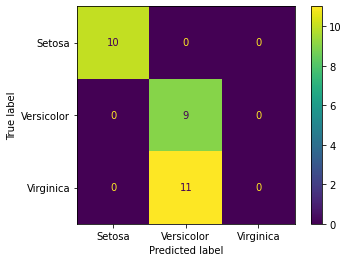

In [41]:
cm = confusion_matrix(y_test, y_preds, labels=['Setosa', 'Versicolor', 'Virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot()
plt.show()

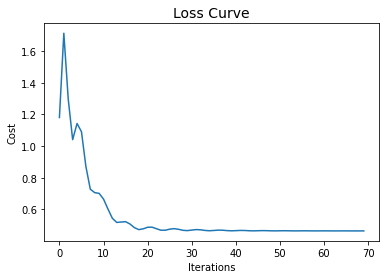

In [42]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#### Making Predictions using trained model

In [43]:
df.loc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [44]:
# Predict one sample
sample = [[5.1, 3.5, 1.4, 0.2]]
sample_scaled = scaler.transform(sample)
clf.predict(sample_scaled.reshape(1, -1))

C:\Users\LeE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype='<U10')

In [45]:
clf.predict_proba(sample_scaled.reshape(1, -1)) # 0.999788176, 0.000165981, 0.00004584

array([[9.99071944e-01, 1.15032498e-04, 8.13023171e-04]])

In [46]:
# Other sample
clf.predict(X_test_scaled[8].reshape(1, -1))

array(['Versicolor'], dtype='<U10')

In [47]:
# Predict all test set
clf.predict(X_test_scaled)

array(['Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa'], dtype='<U10')